In [1]:
layout = @(nr,nc) tiledlayout(nr,nc, 'Padding', 'none', 'TileSpacing', 'compact');

<center> <h1>
Matched Filtering
</h1> </center>

In [2]:
T = sqrt(10*pi); L = 1000; t = linspace(-T,2*T,L); rng(5)
rect = @(t) 1.0*((-0.5<t) & (t<0.5));
g = @(t) sin(t.^2) .* rect(t./T-0.5);
w = @(t) randn(1,length(t));
h = @(t) fliplr(g(t));
y = @(x,h) conv(x,h,'same');

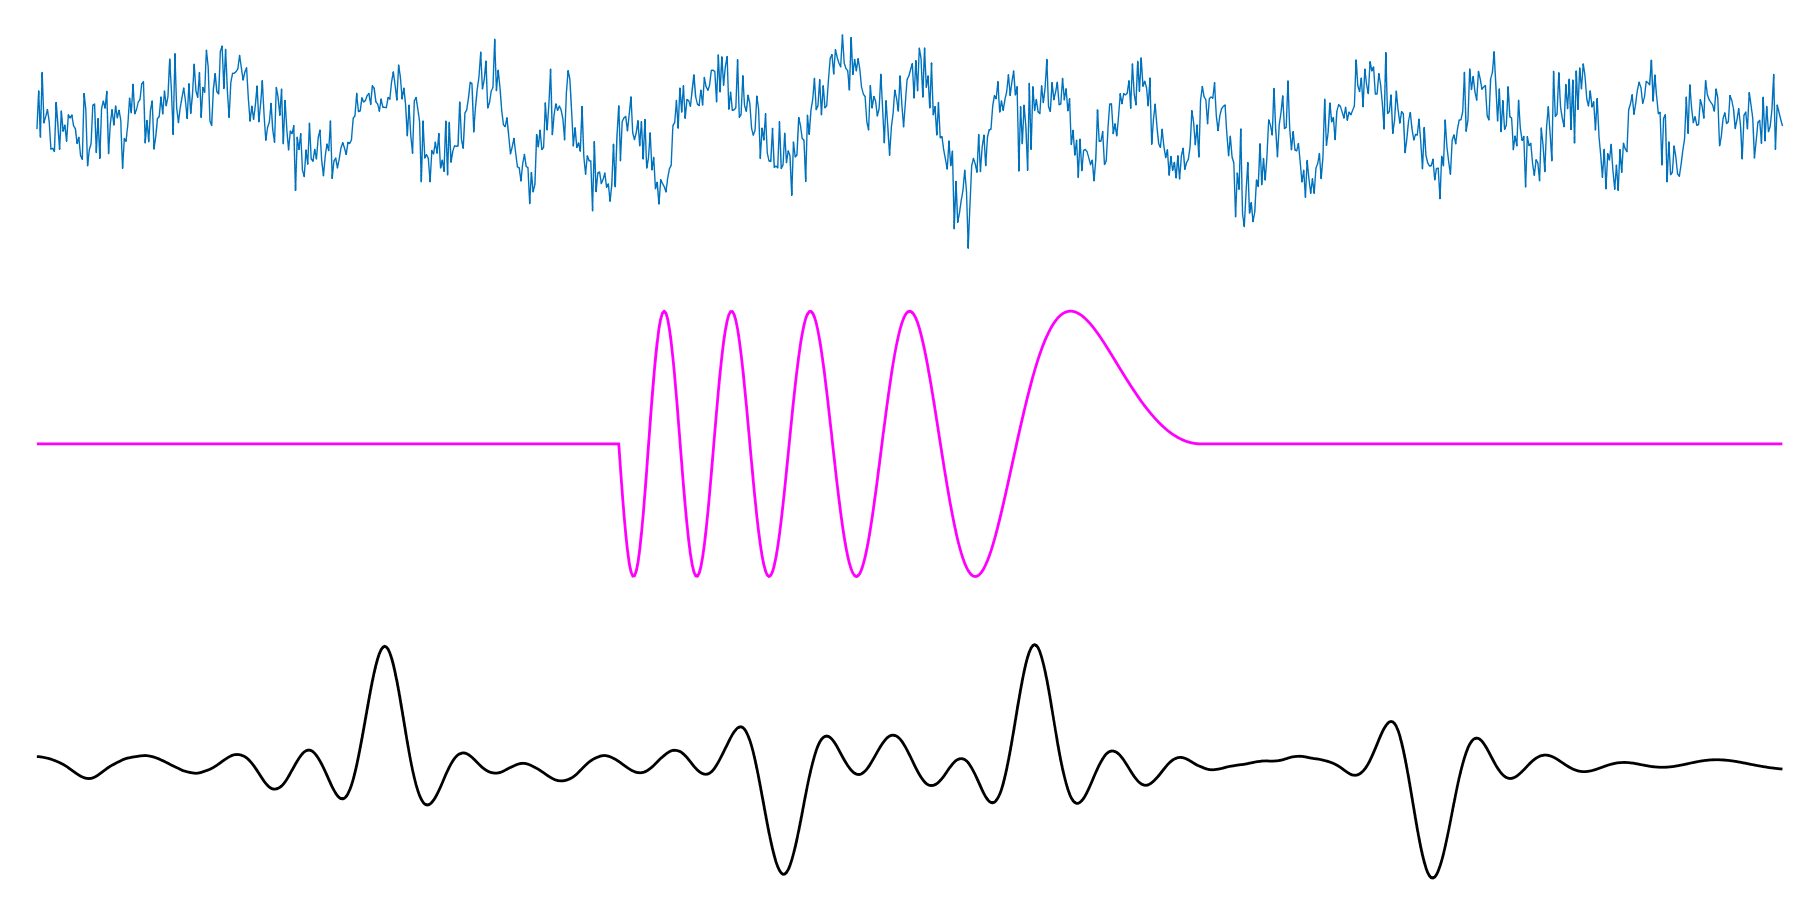

In [3]:
%plot -s 1800,900 -r 100

g = @(t) sin(t.^2) .* rect(t./T-0.5);
x = -g(t+1.2) + g(t-1.2) - g(t-0.9*T) + g(t+0.9*T) + 0.5*w(t);

layout(3,1);
nexttile(); plot(x,'linewidth',1); axis off;
nexttile(); plot(h(t),'m','linewidth',2); axis off;
nexttile(); plot(y(x,h(t)),'k','linewidth',2); axis off;

<center><h3>
Dan Jacobellis | EE 445S | November 8, 2021
</h3></center>

$g(t)$ is a signal or pulse generated by the transmitter

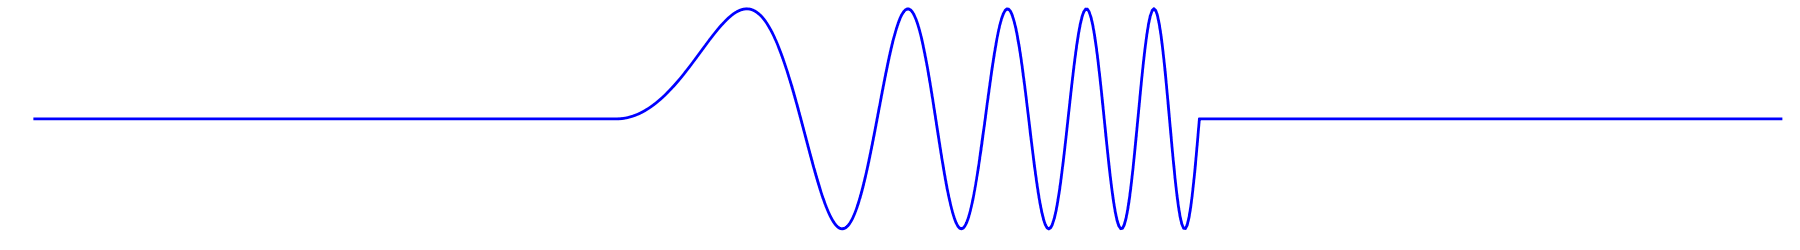

In [4]:
%plot -s 1800,250 -r 100
layout(1,1); nexttile();
plot(g(t),'b','linewidth',2); axis off;

$w(t)$ is additive noise

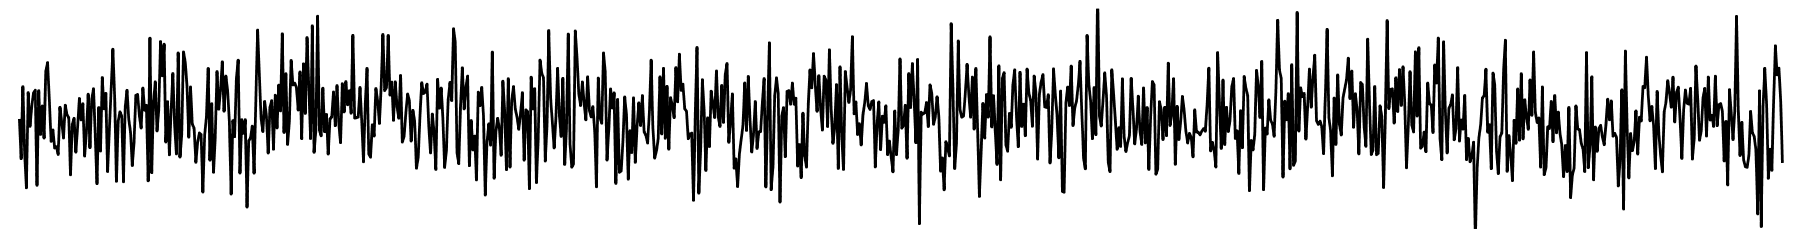

In [5]:
layout(1,1); nexttile();
plot(w(t),'k','linewidth',2); axis off; ylim([-3,3]);

$x(t) = w(t) + \sum_{k=1}^{K}{a_kg(t-T_k)}$ is the received signal 

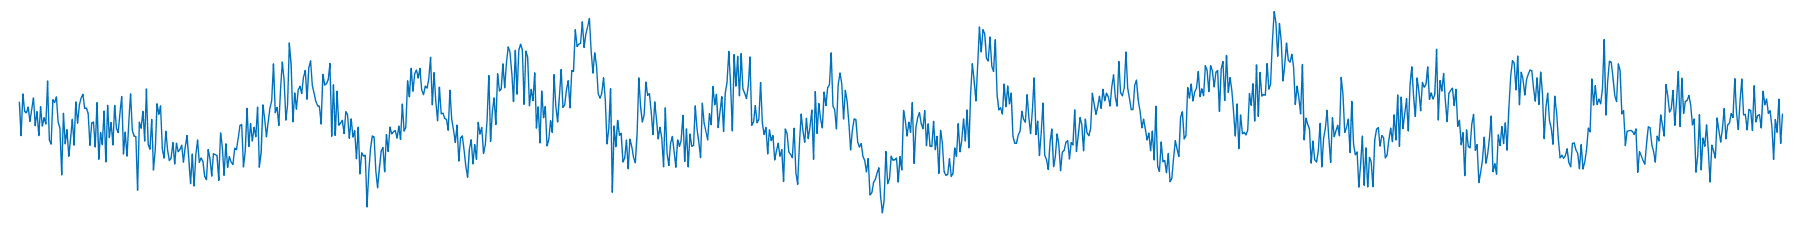

In [6]:
x = g(t+(pi/2)) - g(t-(pi/2)) + g(t-0.9*T) - g(t+0.9*T) + 0.5*w(t);
layout(1,1); nexttile();
plot(x,'linewidth',1); axis off; ylim([-3,3]);

$$x(t) = w(t) + \sum_{k=1}^{K}{a_kg(t-T_k)}$$
Contains copies of $g(t)$ which are

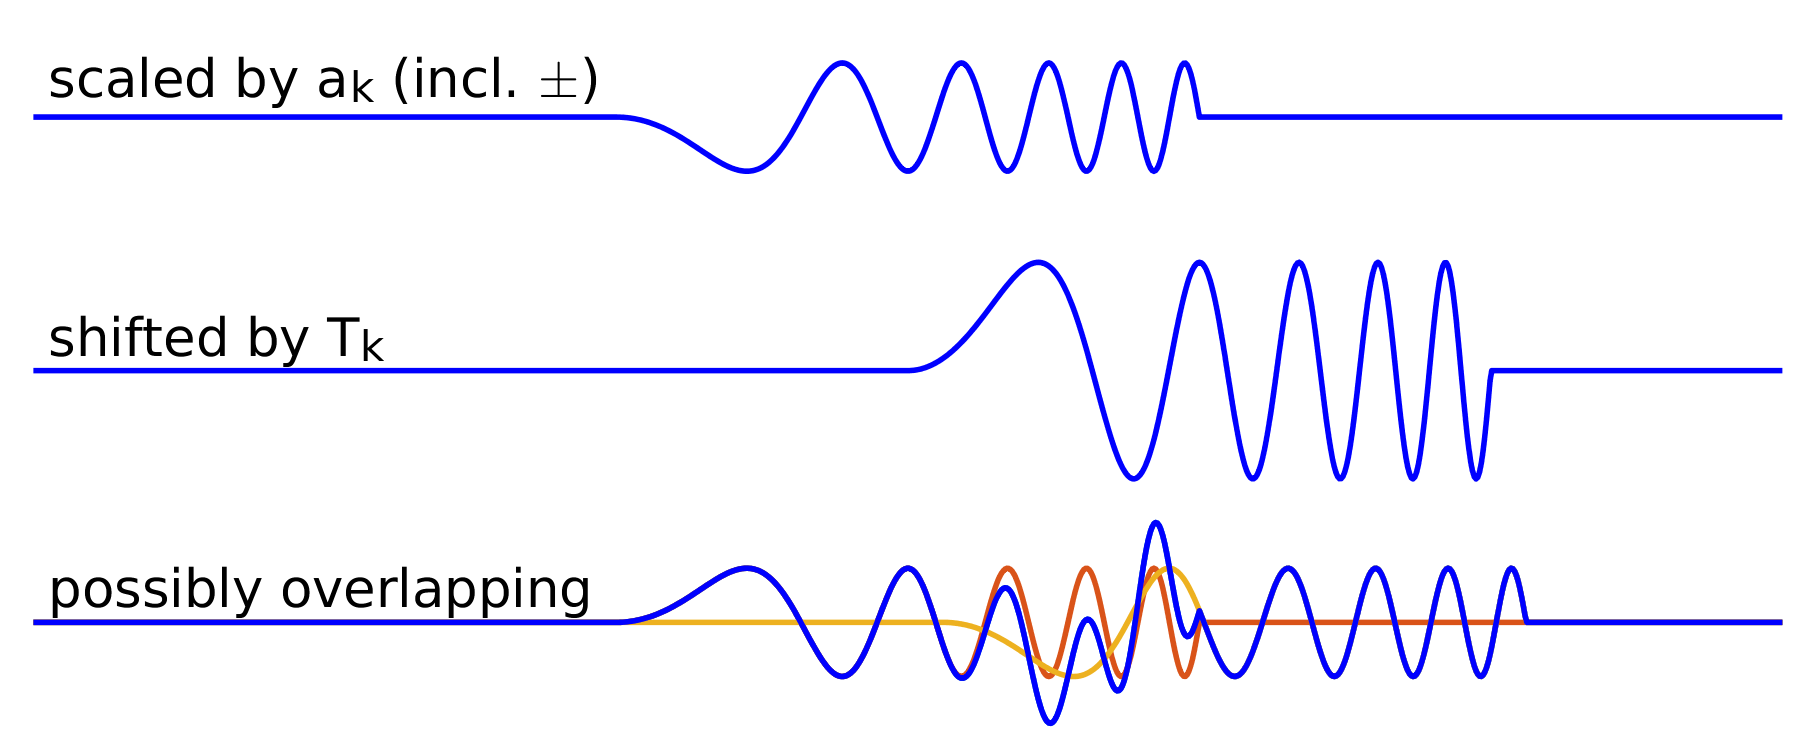

In [7]:
%plot -s 1800,750 -r 100
layout(3,1)

y = -g(t);
nexttile(); plot(y,'b','linewidth',4); axis off; ylim([-2,2])
text(0,0.7,'\fontsize{30} scaled by a_k (incl. \pm)','interpreter','tex');

y = g(t-T/2);
nexttile(); plot(y,'b','linewidth',4); axis off;
text(0,0.3,'\fontsize{30} shifted by T_k','interpreter','tex');

y1 = g(t);
y2 = -g(t-pi);
y3 = y1 + y2;
nexttile(); plot([y3;y1;y2]','linewidth',4);
hold on; plot(y3,'b','linewidth',4); axis off;
text(0,0.6,'\fontsize{30} possibly overlapping','interpreter','tex');

**Goal:** create a filter $h(t)$ which will help us to **detect** and **characterize** any copies of $g(t)$ that are present in $x(t)$.

<center> <h2>
Application: Radar/Sonar
</h2> </center>

* Transmitter and receiver are at known locations (possibly the same location).
* The transmitter sends a pulse $g(t)$ (often a chirp signal).
* The signal propagates through space, and may reflect off of objects
* The receiver listens for the reflections and records them into $x(t)$

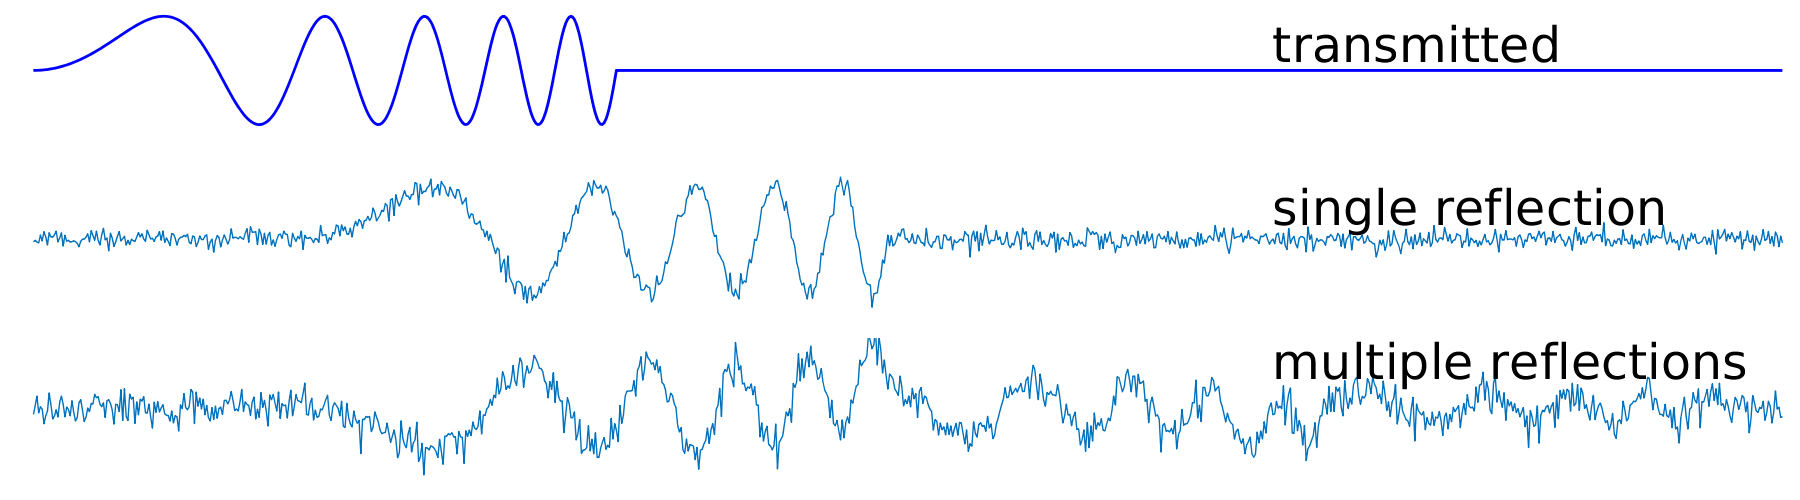

In [8]:
%plot -s 1800,500 -r 100
layout(3,1);

g = @(t) sin(t.^2) .* rect(t./T-0.5);

nexttile();
plot(g(t+T),'b','linewidth',2); axis off; ylim([-1.3,1.3]);
text(700,0.5,'\fontsize{28} transmitted','interpreter','tex');

x = g(t+3) + 0.1*w(t);
nexttile(); plot(x,'linewidth',1); axis off; ylim([-1.3,1.3]);
text(700,0.6,'\fontsize{28} single reflection','interpreter','tex');

x = 0.8*g(t-1.2) - 0.5*g(t-0.9*T) + -1.3*g(t+3) + 0.3*w(t);
nexttile(); plot(x,'linewidth',1); axis off; ylim([-2.2,2.2]);
text(700,1.5,'\fontsize{28} multiple reflections','interpreter','tex');

**Goal:** create a filter $h(t)$ which will help us to **detect** and **characterize** any copies of $g(t)$ that are present in $x(t)$.

<center> <h2>
Application: Digital Communication
</h2> </center>

* Transmitter and receiver are at different (possibly unknown) locations
* The transmitter sends a sequence of pulses $g(t)$ (often a raised cosine).
* Pulses are known to be separated by $T_{sym}$

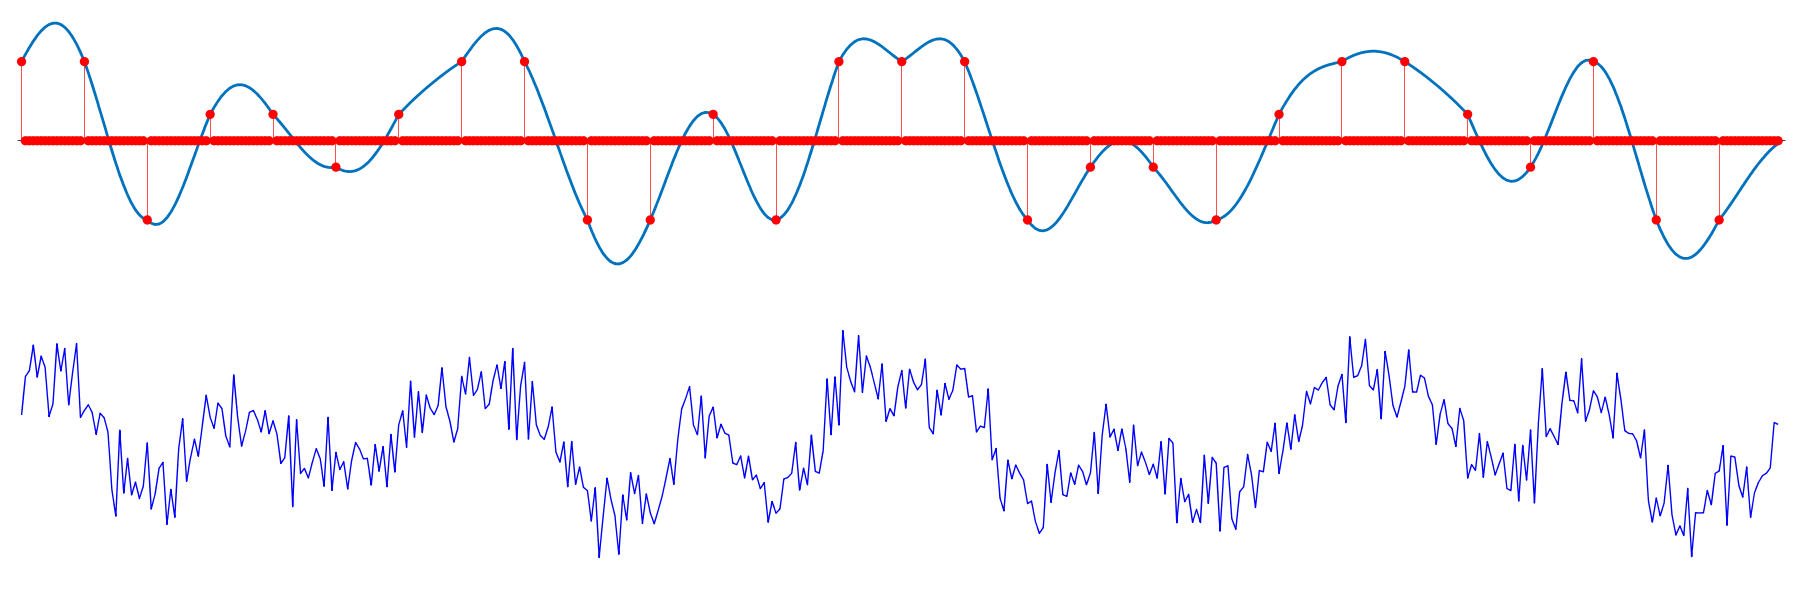

In [9]:
%plot -s 1800,600 -r 100
layout(2,1);

g = sinc(-2:(1/16):2);
serialized_data = reshape((dec2bin(uint8('meatball'))'),[28,2]);
upsampled_data = upsample(2*bin2dec(serialized_data)-3,16);
x = conv(upsampled_data,g,'same');

nexttile();
plot(x,'linewidth',2); hold on; stem(upsampled_data,'r.','markersize',20); axis off;

nexttile();
plot(x + 1.5*w(x)','b','linewidth',1); axis off;

**Goal:** create a filter $h(t)$ which will help us to **detect** and **characterize** any copies of $g(t)$ that are present in $x(t)$.

The received signal is

$$x(t) = w(t) + \sum_{k=1}^{K}{a_kg(t-T_k)}$$

Application of a filter $h(t)$ can be analyzed in terms of its effects on $w(t)$ and $a_kg(t-T_k)$ separately

$$\begin{aligned}
y(t) &= h(t) \ast x(t) \\
&= \underbrace{h(t) \ast w(t)}_{\text{filtered noise}} + \sum_{k=1}^{K}{\underbrace{h(t) \ast a_kg(t-T_k) }_{\text{filtered pulses}}}
\end{aligned}$$

To make predictions about $a_k$ or $T_k$, we want to minimize the power of the filtered noise while maximizing the remaining signal.

The optimal filter can be derived formally by maximizing the signal to noise ratio.

The optimal filter can be derived informally by considering the definition of convolution.

<center> <h2>
Informal Derivation
</h2> </center>

**Question:** what filter $h(t)$ should I apply to $x(t)$ to help me **detect** and **characterize** any copies of $g(t)$?

Ideally, the answer should be useful to both of the applications.

**Simplification:** assume that $x(t)$, $g(t)$, and $h(t)$ must all be real. Then, convolution and cross-correlation have a simple relationship

$$x(t) \ast g(t) = x(t) \star g(-t)$$
$$x(t) \star g(t) = x(t) \ast g(-t)$$

**New question:** what function $h(t)$ should I cross-correlate with $x(t)$ to help me **detect** and **characterize** any copies of $g(t)$?

<center> <h2>
Convolution and Cross-correlation
</h2> </center>

Why is it called cross-**correlation**? What is the relationship to correlation in probability/statistics?

In statistics, correlation measures similarity between two collections of samples.

Example: Want tacos. Don't want to wait in line. Length of line is a random variable.

<img src="popularity.png" width="600"/>

<center> <h2>
What is correlation?
</h2> </center>
Let $ t_c $ be the current time. Imagine you collect some data.

| k | 1 | 2 | 3 | 4 | 5 | $\cdots$ |
|---|---|---|---|---|---|----------|
| $x[k]$ = abs($t_c$ - 11:00am) | 9 | 51 | 26 | 122 | 250 | $\cdots$ |
| $y[k]$ = Number of people in line | 5 | 3 | 2 | 1 | 2 | $\cdots$ |

The data are drawn from random variables $X$ and $Y$. The correlation between these random variables is

$$ \rho(X,Y) = \frac{\text{cov}(X,Y)}{\sqrt{\text{var}(X) \text{var}(Y)}} $$

The **sample correlation** of the collected data is

$$r(x,y) = \frac{1}{\sigma_x \sigma_y}\sum_{k=1}^{K}{(x[k] - \mu_x)(y[k] - \mu_y)} $$

<center> <h2>
What is correlation?
</h2> </center>

$$r(x,y) = \frac{1}{\sigma_x \sigma_y}\sum_{k=1}^{K}{(x[k] - \mu_x)(y[k] - \mu_y)} $$

Correlation is an *inner product*. An inner product measures similarity of two signals.

$$ \text{Inner product of two discrete signals } x_1[n], x_2[n] = \sum_{k=-\infty}^{\infty}{x_1[k]x_2[k]} $$

$$ \text{Inner product of two continuous signals } x_1(t), x_2(t) = \int_{\tau=-\infty}^{\infty}{x_1(\tau)x_2(\tau) d\tau} $$

Positive correlation indicates similarity between $x$ and $y$. Negative correlation indicates similarity between $-x$ and $y$. Noise will lower the correlation.

If $y[k] = \underbrace{a}_{>0}x[k]+ \underbrace{w}_{\text{noise}}$ then $0<r<1$.

If $y[k] = \underbrace{a}_{<0}x[k]+ \underbrace{w}_{\text{noise}}$ then $-1<r<0$.

<center> <h3>
Convolution and cross-correlation as an inner product
</h3> </center>

The convolution operation is defined as:

$$x_1[n]*x_2[n] = \sum_{k=-\infty}^{\infty}x_1[k]x_2[n-k]$$

$$x_1(t)*x_2(t) = \int_{\tau=-\infty}^{\infty}x_1(\tau)x_2(t-\tau)$$

The cross-correlation operation is nearly identical to convolution, but without the 'flip'

$$x_1[n]\star x_2[n] = \sum_{k=-\infty}^{\infty}\overline{x_1[k]}x_2[n+k]$$

$$x_1(t)\star x_2(t) = \int_{\tau=-\infty}^{\infty}\overline{x_1(\tau)}x_2(t+\tau)$$

<center> <h3>
Convolution and cross-correlation as an inner product
</h3> </center>

An inner product takes two signals and returns a number.

$$ \text{Inner product of two continuous signals } x_1(t), x_2(t) = \int_{\tau=-\infty}^{\infty}{x_1(\tau)x_2(\tau) d\tau} $$

Convolution and cross-correlation take two signals and return **another signal**

$$x_1(t)*x_2(t) = \int_{\tau=-\infty}^{\infty}x_1(\tau)x_2(t-\tau)$$

$$x_1(t)\star x_2(t) = \int_{\tau=-\infty}^{\infty}\overline{x_1(\tau)}x_2(t+\tau)$$

The new signal is no longer a function of the original time variable. Instead it's a function of the relative **time shift** between the two signals.

For any particular time shift, cross-correlation tells us about about the similarity of $\overline{x_1(t)}$ and $x_2(t)$.

For any particular time shift, convolution tells us about the similarity of $x_1(t)$ and $x_2(-t)$.

<center> <h2>
Informal Derivation
</h2> </center>

Back to the question:

Assume that $x(t)$ and $g(t)$ are both real. What function should we cross-correlate with $x(t)$ to help **detect** and **characterize** any copies of $g(t)$?

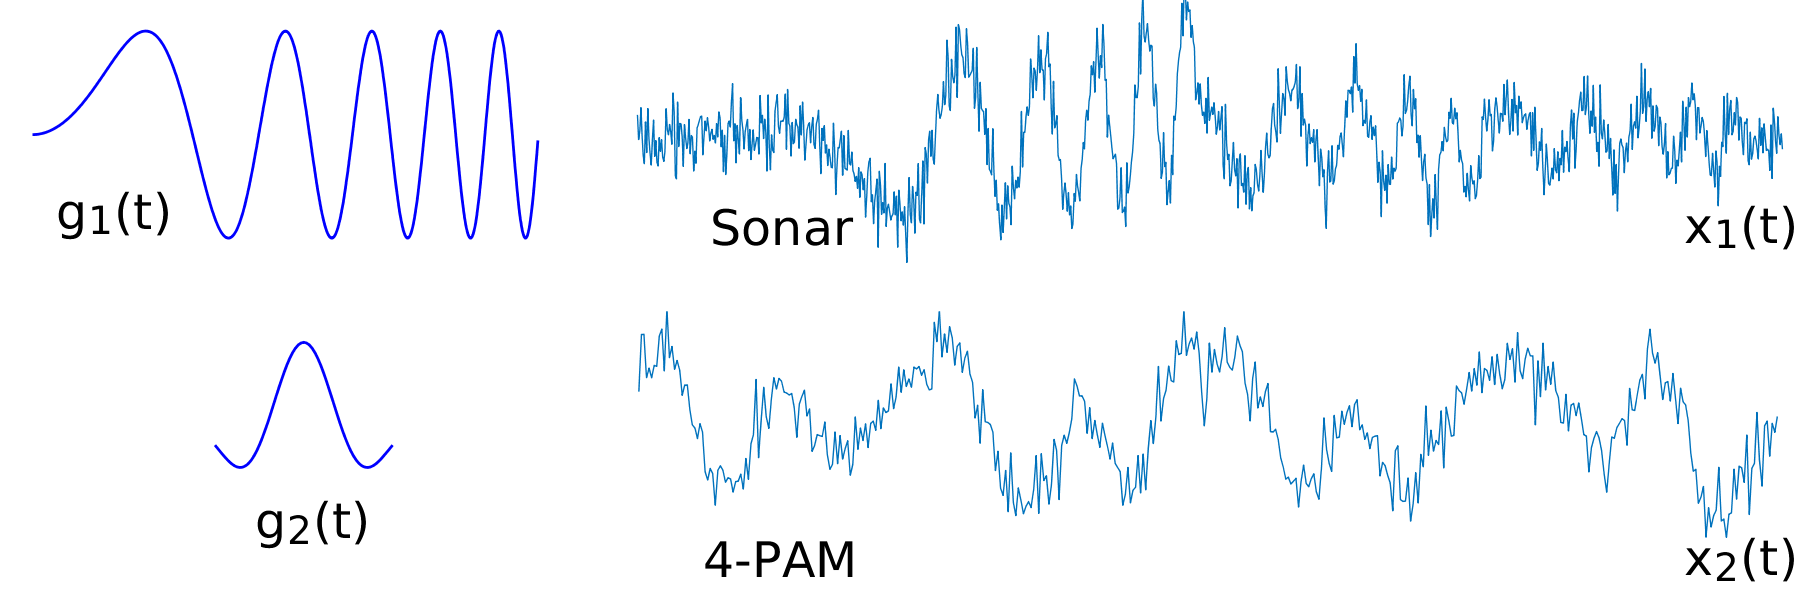

In [10]:
%plot -s 1800,600 -r 100
layout(2,3);

g = @(t) sin(t.^2) .* rect(t./T-0.5);

nexttile();
plot(g(0:0.01:T),'b','linewidth',2); axis off; ylim([-1.3,1.3]);
text(10,-0.75,'\fontsize{28} g_1(t)','interpreter','tex');

x = 0.8*g(t-1.2) - 0.5*g(t-0.9*T) + -1.3*g(t+3) + 0.3*w(t);
nexttile([1,2]); plot(x,'linewidth',1); axis off; ylim([-2.2,2.2]);
text(900,-1.5,'\fontsize{28} x_1(t)','interpreter','tex');
text(50,-1.5,'\fontsize{28} Sonar','interpreter','tex');

g = sinc(-2:(1/16):2);
serialized_data = reshape((dec2bin(uint8('meatball'))'),[28,2]);
upsampled_data = upsample(2*bin2dec(serialized_data)-3,16);
x = conv(upsampled_data,g,'same');
x = x + w(x)';

nexttile();
plot(g,'b','linewidth',2); axis off; ylim([-1.3,1.3]); xlim([-65,130])
text(10,-0.75,'\fontsize{28} g_2(t)','interpreter','tex');

nexttile([1,2]); plot(x,'linewidth',1); axis off; ylim([-8,6])
text(405,-7,'\fontsize{28} x_2(t)','interpreter','tex');
text(20,-7,'\fontsize{28} 4-PAM','interpreter','tex');

**Answer:** The function that will produce a measure of similarity between $x(t)$ and $g(t-\tau)$ for every possible time shift $\tau$.

**Answer:** We should cross-correlate x(t) with the signal g(t) that we want to detect.

<center> <h2>
Informal Derivation
</h2> </center>

What filter $h(t)$ should be applied to $x(t)$ to help **detect** and **characterize** any copies of $g(t)$?

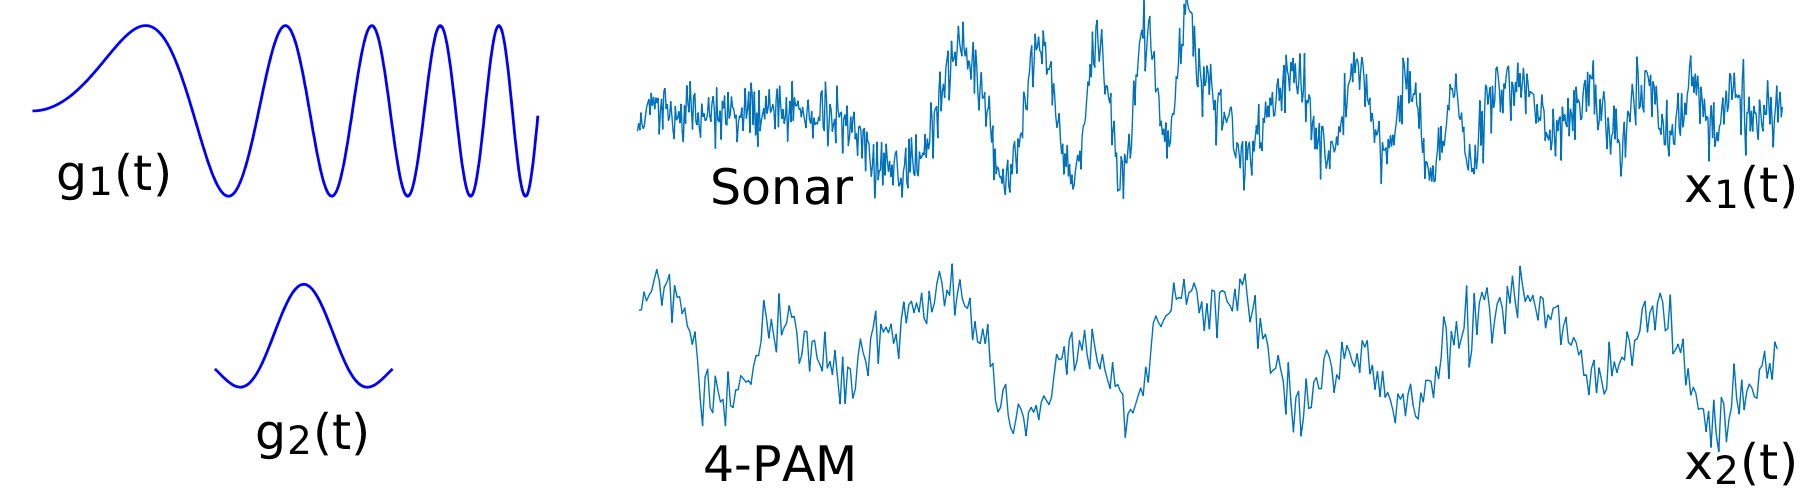

In [11]:
%plot -s 1800,500 -r 100
layout(2,3);

g = @(t) sin(t.^2) .* rect(t./T-0.5);

nexttile();
plot(g(0:0.01:T),'b','linewidth',2); axis off; ylim([-1.3,1.3]);
text(10,-0.75,'\fontsize{28} g_1(t)','interpreter','tex');

x = 0.8*g(t-1.2) - 0.5*g(t-0.9*T) + -1.3*g(t+3) + 0.3*w(t);
nexttile([1,2]); plot(x,'linewidth',1); axis off; ylim([-2.2,2.2]);
text(900,-1.5,'\fontsize{28} x_1(t)','interpreter','tex');
text(50,-1.5,'\fontsize{28} Sonar','interpreter','tex');

g = sinc(-2:(1/16):2);
serialized_data = reshape((dec2bin(uint8('meatball'))'),[28,2]);
upsampled_data = upsample(2*bin2dec(serialized_data)-3,16);
x = conv(upsampled_data,g,'same');
x = x + w(x)';

nexttile();
plot(g,'b','linewidth',2); axis off; ylim([-1.3,1.3]); xlim([-65,130])
text(10,-0.75,'\fontsize{28} g_2(t)','interpreter','tex');

nexttile([1,2]); plot(x,'linewidth',1); axis off; ylim([-8,6])
text(405,-7,'\fontsize{28} x_2(t)','interpreter','tex');
text(20,-7,'\fontsize{28} 4-PAM','interpreter','tex');

**Answer:** The time-reversed filter $h(-t)$ should **match** the known signal $g(t)$.

**Conclusion:** The optimal filter is the matched filter: $h(t) = g(-t)$

**Disclaimer:** if we allow complex signals then $ h(t) = \overline{g(-t)} $

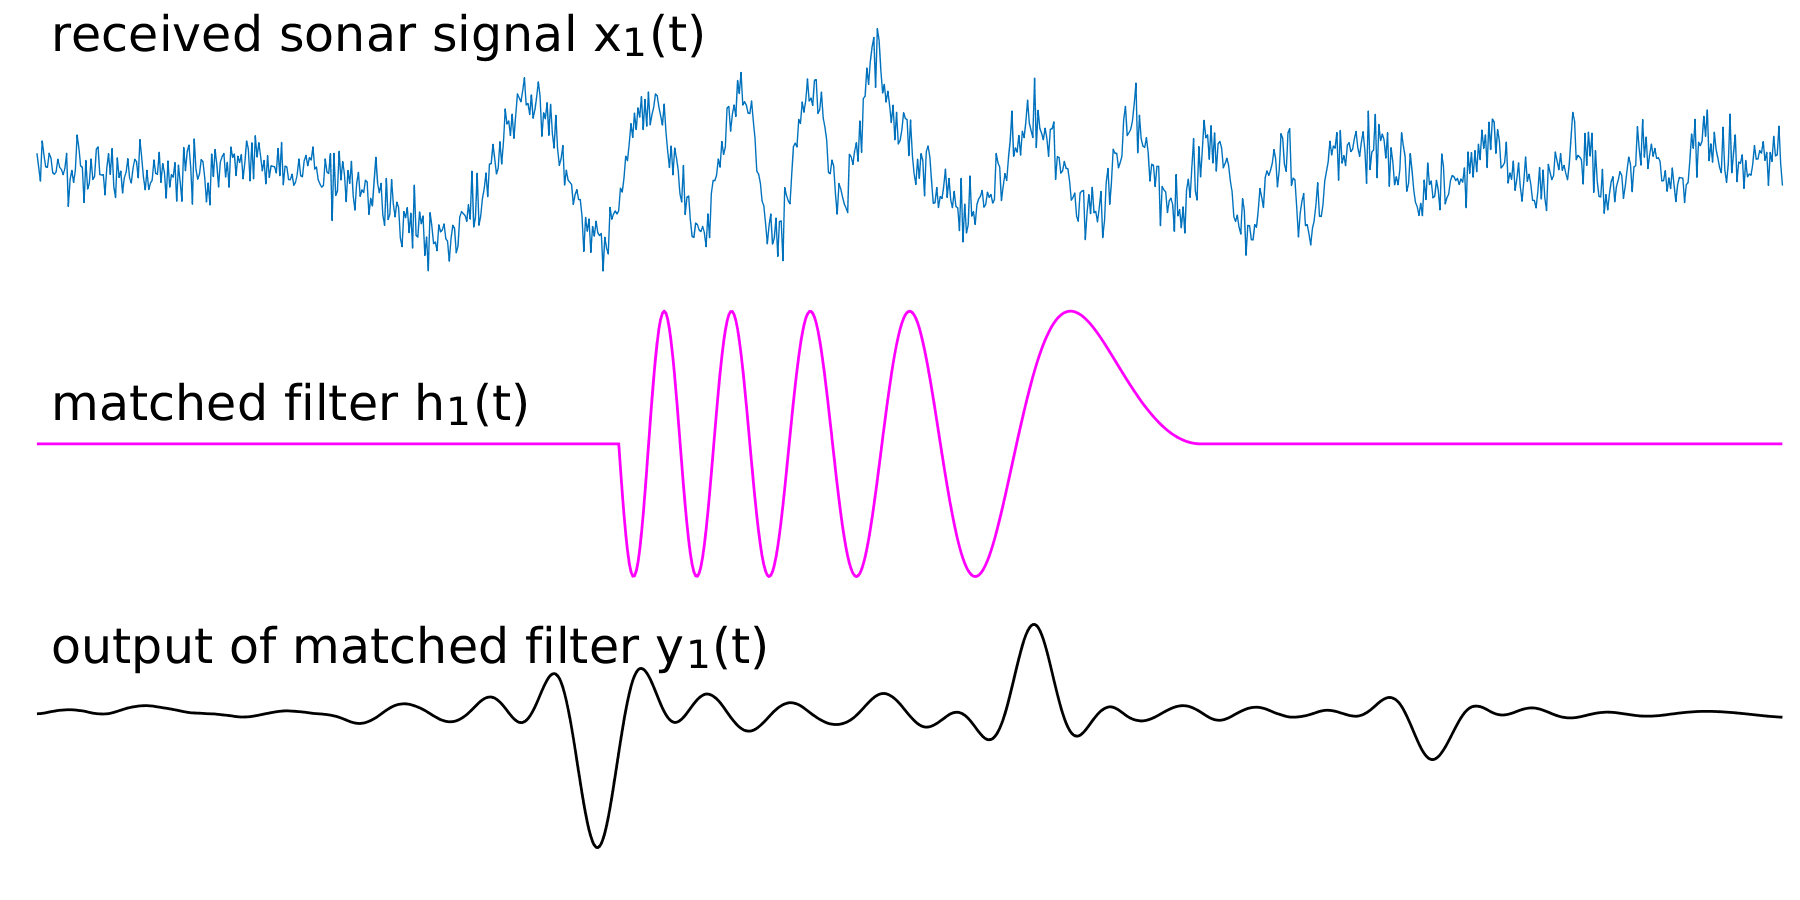

In [12]:
%plot -s 1800,900 -r 100

g = @(t) sin(t.^2) .* rect(t./T-0.5);
h = fliplr(g(t));
x = 0.8*g(t-1.2) - 0.5*g(t-0.9*T) + -1.3*g(t+3) + 0.3*w(t);
y = conv(x,h,'same');

layout(3,1);
nexttile(); plot(x,'linewidth',1); axis off;
text(0,2.5,'\fontsize{28} received sonar signal x_1(t)', 'interpreter','tex');
nexttile(); plot(h,'m','linewidth',2); axis off;
text(0,0.3,'\fontsize{28} matched filter h_1(t)', 'interpreter','tex');
nexttile(); plot(y,'k','linewidth',2); axis off;
text(0,100,'\fontsize{28} output of matched filter y_1(t)', 'interpreter','tex');

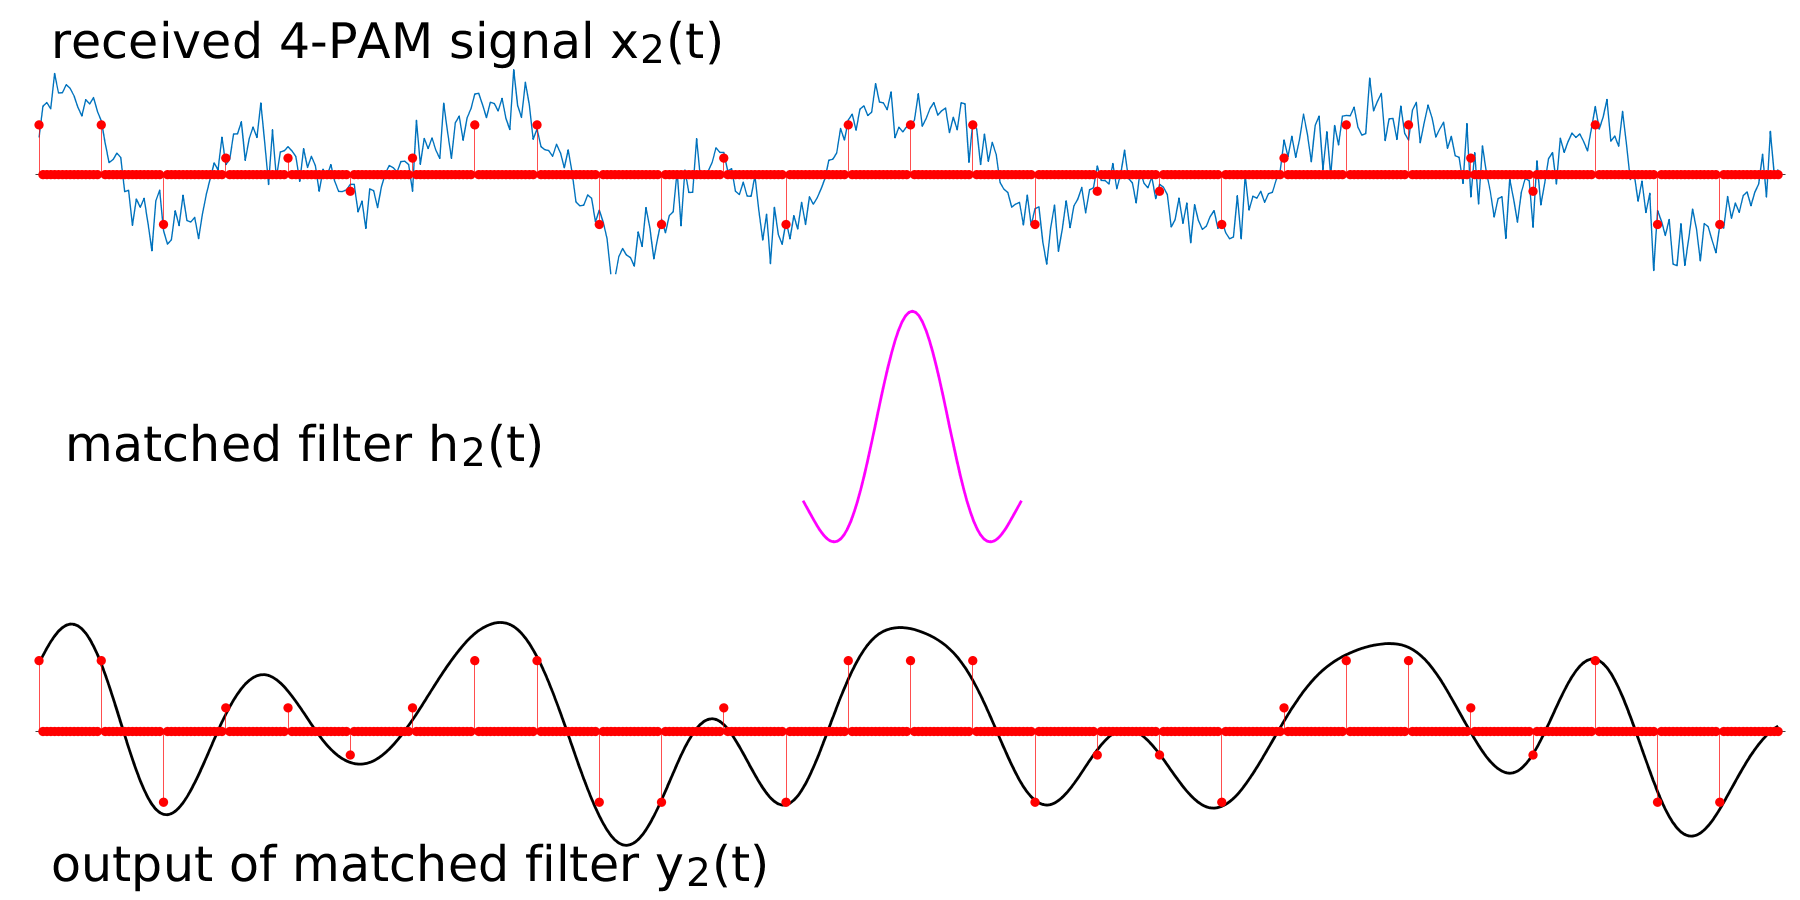

In [13]:
%plot -s 1800,900 -r 100

g = sinc(-2:(1/16):2);
serialized_data = reshape((dec2bin(uint8('meatball'))'),[28,2]);
upsampled_data = upsample(2*bin2dec(serialized_data)-3,16);
x = conv(upsampled_data,g,'same');
x = x + w(x)';
h = g;
y = conv(x,h,'same');

layout(3,1);
nexttile(); plot(x,'linewidth',1); axis off;
hold on; stem(upsampled_data,'r.','markersize',20); axis off;ylim([-6,10])
text(0,8,'\fontsize{28} received 4-PAM signal x_2(t)', 'interpreter','tex');
nexttile(); plot(h,'m','linewidth',2); axis off; xlim([-224,224+65]);
text(-220,0.3,'\fontsize{28} matched filter h_2(t)', 'interpreter','tex');
nexttile(); plot(y,'k','linewidth',2); axis off;
hold on; stem(16*upsampled_data,'r.','markersize',20); axis off;  ylim([-100,80])
text(0,-90,'\fontsize{28} output of matched filter y_2(t)', 'interpreter','tex');

<center> <h2>
Simulation
</h2> </center>

In [81]:
g = sinc(-2:(1/16):2);
E = sum(g.^2);

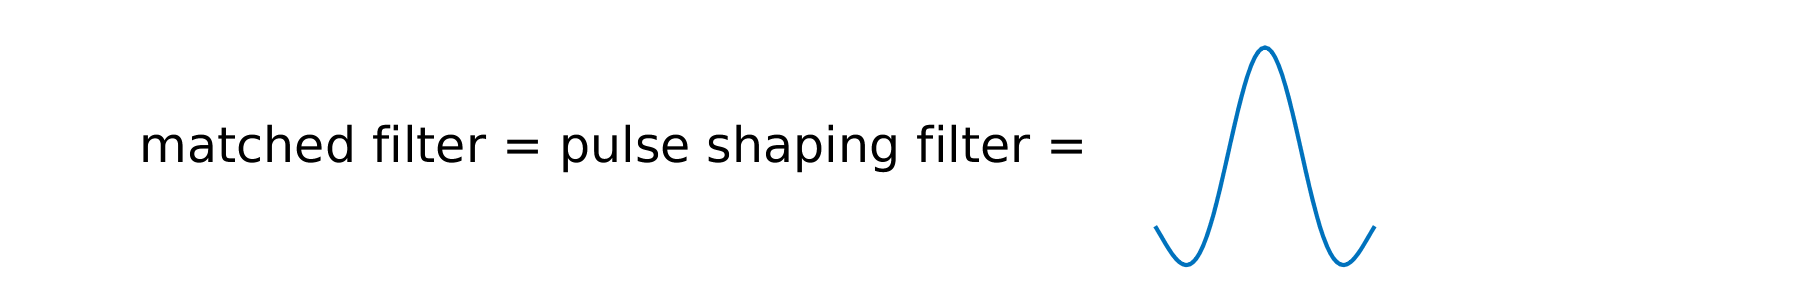

In [82]:
%plot -s 1800,300 -r 100
layout(1,1); nexttile();
plot(g/E,'linewidth',3); axis off; xlim([-224-100,224+65-100]);
text(-300,0.03,'\fontsize{28} matched filter = pulse shaping filter =  ', 'interpreter','tex');

In [85]:
symbols = reshape((dec2bin(uint8('meatball'))'),[28,2]);
amplitudes = upsample(2*bin2dec(serialized_data)-3,16);
pulses = conv(amplitudes,g/E,'same');
x = pulses + 0.1*randn(size(pulses));

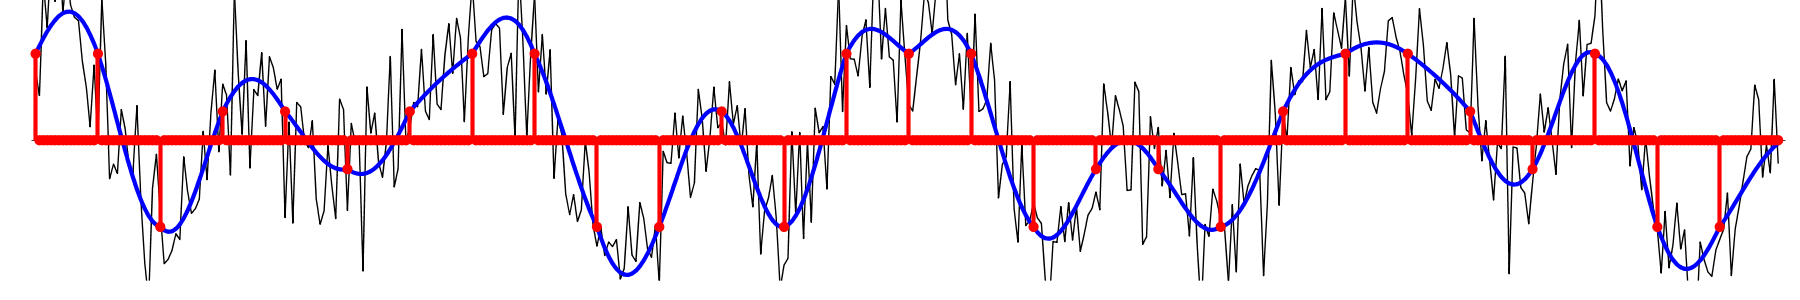

In [86]:
%plot -s 1800,300 -r 100
layout(1,1); nexttile(); hold on;
plot(x,'k','linewidth',1);
plot(pulses,'b','linewidth',3); axis off;
stem(amplitudes/E,'r.','markersize',22,'linewidth',3); axis off; ylim([-0.32,0.32])

<center> <h2>
Simulation
</h2> </center>

In [98]:
quantize = @(x) 2*(round(0.5*x + 1.5)-1.5);
h = E*ones(16,1)/16;
y = conv(x,h,'same');
yT = quantize(downsample(y,16));

In [99]:
yT(yT>3) = 3;
yT(yT<-3) = -3;

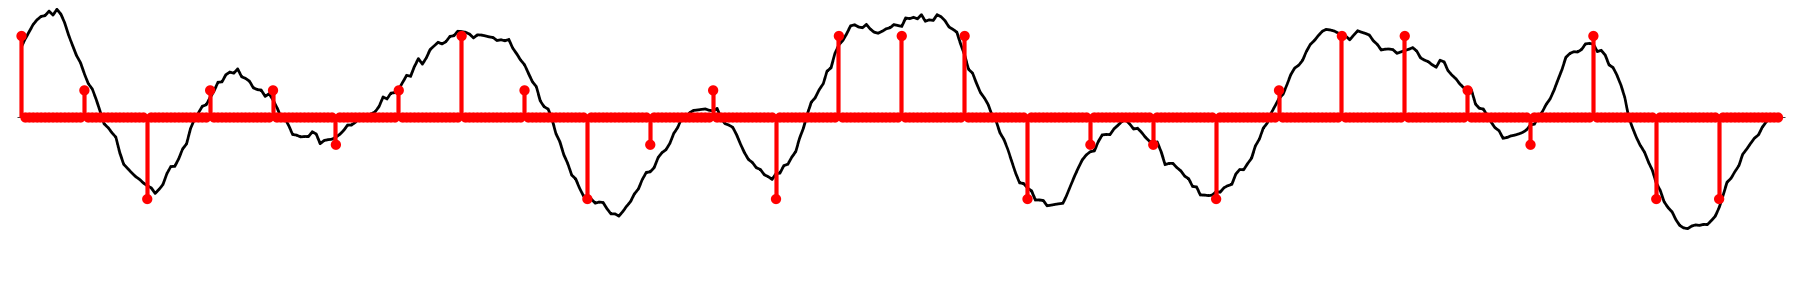

In [100]:
%plot -s 1800,300 -r 100
layout(1,1); nexttile(); hold on;
plot(y,'k','linewidth',2); axis off;
stem(upsample(yT,16),'r.','markersize',22,'linewidth',3); axis off;

In [101]:
number_errors = sum(abs((yT - downsample(amplitudes,16)))>0)


number_errors =

     3



<center> <h2>
Simulation
</h2> </center>

In [102]:
h = g;
y = conv(x,h,'same');
yT = quantize(downsample(y,16));

In [103]:
yT(yT>3) = 3;
yT(yT<-3) = -3;

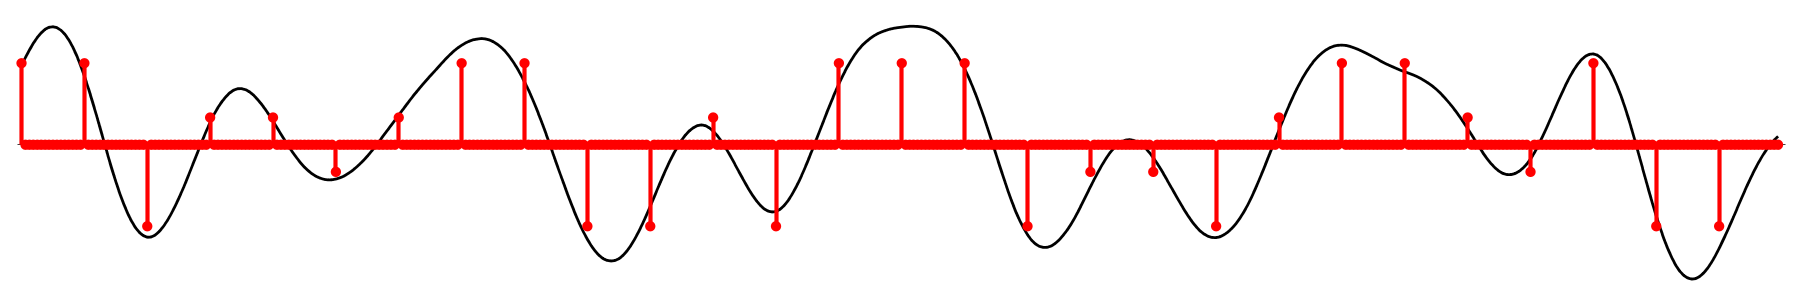

In [104]:
%plot -s 1800,300 -r 100
layout(1,1); nexttile(); hold on;
plot(y,'k','linewidth',2); axis off;
stem(upsample(yT,16),'r.','markersize',22,'linewidth',3); axis off;

In [105]:
number_errors = sum(abs((yT - downsample(amplitudes,16)))>0)


number_errors =

     0



<center> <h2>
Formal Derivation
</h2> </center>

Application of a filter $h(t)$ can be analyzed in terms of its effects on $w(t)$ and $a_kg(t-T_k)$ separately

$$\begin{aligned}
y(t) &= h(t) \ast x(t) \\
&= \underbrace{h(t) \ast w(t)}_{\text{filtered noise}} + \sum_{k=1}^{K}{\underbrace{h(t) \ast a_kg(t-T_k) }_{\text{filtered pulses}}}
\end{aligned}$$

To make predictions about $a_k$ or $T_k$, we want to minimize the power of the filtered noise while maximizing the remaining signal.

We want to maximize the signal to noise ratio at the times $T_k$ Where a copy of $g(t)$ is present.

<center> <h2>
Formal Derivation
</h2> </center>

$$\begin{aligned}
y(t) &= h(t) \ast x(t) \\
&= \underbrace{h(t) \ast w(t)}_{\text{filtered noise}} + \sum_{k=1}^{K}{\underbrace{h(t) \ast a_kg(t-T_k) }_{\text{filtered pulses}}}
\end{aligned}$$

$$ |g_0(t)|^2 = |g(t) \ast h(t)|^2 = \text{output signal power} $$

$$ E\left[n^2(t)\right] = E\left[\left(w(t) \ast h(t)\right)^2\right] = \text{output noise power}$$

Goal: maximize the peak pulse SNR

$$ \eta = \frac{\text{Peak signal power}}{\text{Average noise power}} = \frac{|g_0(t)|^2}{E\left[n^2(t)\right]} $$

<center> <h2>
Formal Derivation
</h2> </center>

We don't know the amplitude values of $n(t)$ but we can find its **power spectrum**.

$$\begin{aligned}
P_N(f) &= |N(f)|^2 \\
&= N(f) \overline{N(f)} \\
&= \mathcal{F}\left\{ n(t) \ast \overline{n(t)} \right\} \\
&= \mathcal{F}\left\{ R_n(t) \right\}
\end{aligned}$$

For the two-sided random noise signal $n(t)$, the Fourier transform may not exist, but its power spectrum does. 

<center> <h2>
Formal Derivation
</h2> </center>

For a zero-mean Gaussian random process $n(t)$ with variance $\sigma ^2$, the autocorrelation is $R_n(t)=\sigma ^2 \delta(t)$

Therefore, its power spectrum is $P_n(f) = \mathcal{F} \left\{ R_n(t) \right\} = \sigma ^2$

The noise at the output of the matched filter is $n(t) = w(t) \ast h(t)$

Its power spectrum is

$$ S_N(f) = S_W(f)S_H(f) = \frac{N_0}{2} |H(f)|^2 $$

$$ \text{Average noise power} = E\left[n^2(t)\right] = \int_{-\infty}^{\infty} S_N(f)df = \int_{-\infty}^{\infty} \frac{N_0}{2} |H(f)|^2 df$$

<center> <h2>
Formal Derivation
</h2> </center>

$$\begin{aligned}
g_0(t) &= g(t) \ast h(t) \\
G_0(t) &= H(f)G(f)
\end{aligned}$$

$$\begin{aligned}
|g_0(t)|^2 &= |\mathcal{F}^{-1} \left\{ G_0(f) \right\}|^2 \\
& = |\mathcal{F}^{-1} \left\{ H(f)G(f) \right\}|^2 \\
&= \left| \int_{-\infty}^{\infty}{ H(f)G(f) e^{j2\pi f T} df }\right|^2 
\end{aligned}$$

$$ \eta = \frac{\text{Peak signal power}}{\text{Average noise power}} = \frac{|g_0(t)|^2}{E\left[n^2(t)\right]} = \frac{\left| \int_{-\infty}^{\infty}{ H(f)G(f) e^{j2\pi f T} df }\right|^2}{\frac{N_0}{2}\int_{-\infty}^{\infty} |H(f)|^2 df} $$

<center> <h2>
Formal Derivation
</h2> </center>

$$ \eta = \frac{\text{Peak signal power}}{\text{Average noise power}} = \frac{\left| \int_{-\infty}^{\infty}{ H(f)G(f) e^{j2\pi f T} df }\right|^2}{\frac{N_0}{2}\int_{-\infty}^{\infty} |H(f)|^2 df} $$

**Question:** How do we maximize $\eta$?

**Answer:** Schwarz inequality can be used to determine an **upper bound** for the **inner product.**

$$|\langle u,v \rangle|^2 \leq |u|^2 |v|^2$$

$$\left| \int{\phi_1(x)\phi_2(x)dx} \right|^2 \leq \int{\left|\phi_1(x)\right|^2dx} \int{\left|\phi_2(x)\right|^2dx} $$

After some simplification, the maximum SNR becomes

$$\eta_\max = \frac{2}{N_0} \int_{-\infty}^{\infty} \left| G(f) \right|^2 df$$

Which occurs when $h(t) = k\overline{g(t-T)}$

<center> <h2>
In lecture assignment 4
</h2> </center>

In-Lecture Assignment Related to Homework #6
Consider performing an iterative maximization of

$$ J(x) =8 - x^2 + 6 \cos(6 x)$$

via the steepest descent algorithm (JSK equation (6.5) on page 116) with the sign on the update reversed from negative to positive so that the algorithm will maximize rather than minimize; i.e.

$$ x[k+1] = x[k] + \mu \frac{dJ(x)}{dx}$$

where $x = x[k]$

<center> <h2>
In lecture assignment 4
</h2> </center>

Visualize and analyze the shape of the objective function $J(x)$.

1. Plot $J(x)$ for $-5 < x < 5$. Give the Matlab code for your answer.
2. Describe the plot.
3. How many local maxima do you see?

In [122]:
%plot -s 800,300 -r 100

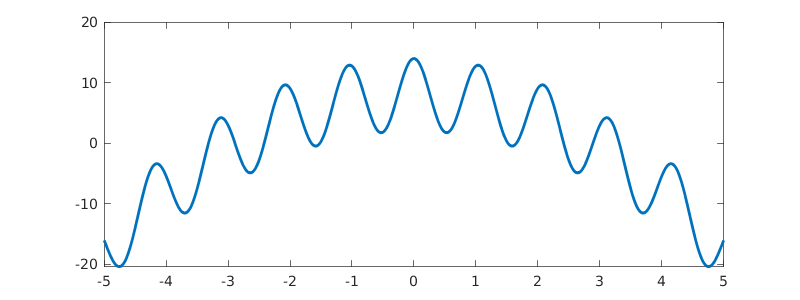

In [123]:
J = @(x) 8 - x.^2 + 6*cos(6*x);
x = linspace(-5,5,1000);
plot(x,J(x),'linewidth',2');

<center> <h2>
In lecture assignment 4
</h2> </center>

Implement the steepest descent algorithm in Matlab with $x_0$ = 0.7.

1. To what value does the steepest descent algorithm converge?

2. Is the convergent value of x in the global maximum of J(x)? Why or why not?

In [125]:
dJdx = @(x) -2*x - 36*sin(6*x);
N=50;         % number of iterations
mu=0.001;     % algorithm stepsize
x=zeros(1,N); % initialize sequence of x values to zero
x(1)=0.7;     % starting point x(1)
for k=1:N-1
    x(k+1)= x(k) + (dJdx(x(k)))*mu;   % update equation
end
x(end)


ans =

    1.0376



<center> <h2>
In lecture assignment 4
</h2> </center>

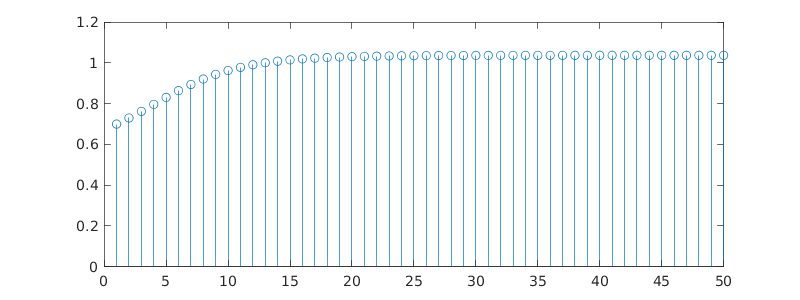

In [126]:
stem(x)